In [19]:
from frc3223_azurite.data import read_csv
from matplotlib import pyplot
import numpy
import numpy as np
from scipy import stats

def sg_filter(x, m, k=0):
    """
    x = Vector of sample times
    m = Order of the smoothing polynomial
    k = Which derivative
    """
    mid = len(x) // 2        
    a = x - x[mid]
    expa = lambda x: list(map(lambda i: i**x, a)  )  
    A = np.r_[list(map(expa, range(0,m+1)))].transpose()
    Ai = np.linalg.pinv(A)

    return Ai[k]

def smooth(x, y, size=5, order=2, deriv=0):

    if deriv > order:
        raise Exception( "deriv must be <= order")

    n = len(x)
    m = size

    result = np.zeros(n)

    for i in range(m, n-m):
        start, end = i - m, i + m + 1
        f = sg_filter(x[start:end], order, deriv)
        result[i] = np.dot(f, y[start:end])

    if deriv > 1:
        result *= math.factorial(deriv)

    return result

In [52]:
data=read_csv("drivetrain1.csv")
"""time is in seconds"""
ts=data["time"][3:50]
"""
velocities have units encoder ticks/100 ms
"""
vsl=data["enc_vel_l"][3:50]
vsr=-data["enc_vel_r"][3:50]
bus_voltages = data["voltage"][3:50]
percentVLeft = data["VRL"][3:50]
voltages = (bus_voltages * percentVLeft)


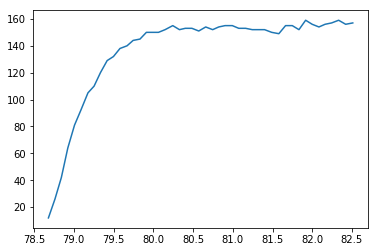

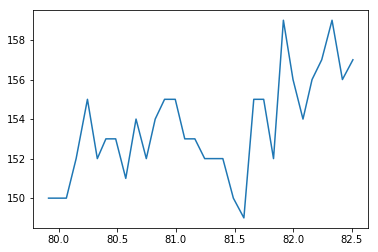

#1 velocity left:  153.53125


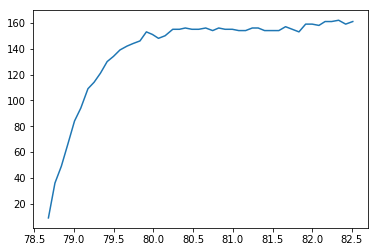

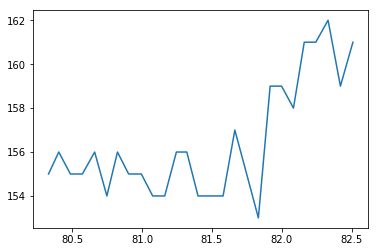

#1 velocity right:  156.44444444444446


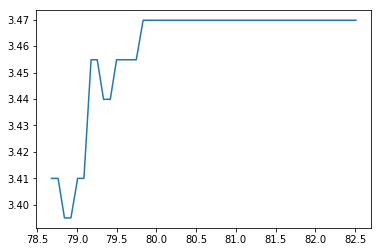

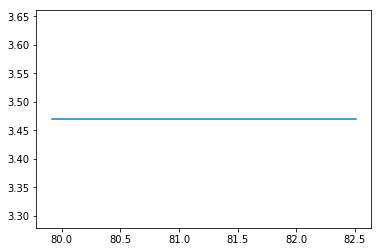

#1 voltage:  3.469794721407625


In [54]:
pyplot.plot(ts, vsl)
pyplot.show()
pyplot.plot(ts[15:], vsl[15:])
pyplot.show()
vl1 = vsl[15:].mean()
print ("#1 velocity left: ", vl1)
pyplot.plot(ts, vsr)
pyplot.show()
pyplot.plot(ts[20:], vsr[20:])
pyplot.show()
vr1 = vsr[20:].mean()
print ("#1 velocity right: ", vr1)
pyplot.plot(ts, voltages)
pyplot.show()
pyplot.plot(ts[15:], voltages[15:])
pyplot.show()
voltage1 = voltages[15:].mean()
print ("#1 voltage: ", voltage1)

In [55]:
data=read_csv("drivetrain3.csv")
ts=data["time"][240:288]
vsl=data["enc_vel_l"][240:288]
vsr=-data["enc_vel_r"][240:288]
bus_voltages = data["voltage"][240:288]
percentVLeft = data["VRL"][240:288]
voltages = (bus_voltages * percentVLeft)

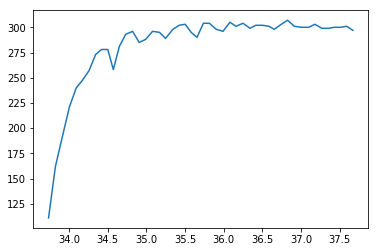

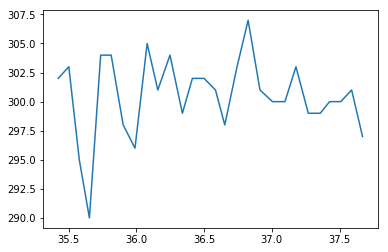

#2 velocity left:  300.5


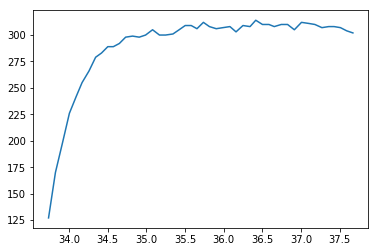

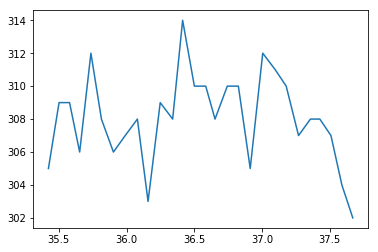

#2 velocity right:  308.07142857142856


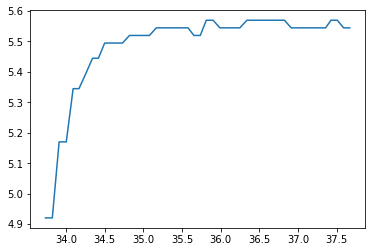

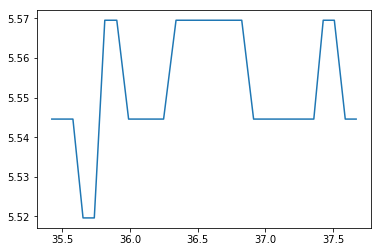

#2 voltage:  5.552602639296187


In [57]:
pyplot.plot(ts, vsl)
pyplot.show()
pyplot.plot(ts[20:], vsl[20:])
pyplot.show()
vl2 = vsl[20:].mean()
print ("#2 velocity left: ", vl2)
pyplot.plot(ts, vsr)
pyplot.show()
pyplot.plot(ts[20:], vsr[20:])
pyplot.show()
vr2 = vsr[20:].mean()
print ("#2 velocity right: ", vr2)
pyplot.plot(ts, voltages)
pyplot.show()
pyplot.plot(ts[20:], voltages[20:])
pyplot.show()
voltage2 = voltages[20:].mean()
print ("#2 voltage: ", voltage2)

In [62]:
vsls = [vl1, vl2]
vsrs = [vr1, vr2]
vtgs = [voltage1, voltage2]

kvl, ksl, _, _, _ = stats.linregress(vsls, vtgs)
print ("kvl: ", kvl)
print ("ksl: ", ksl)
kvr, ksr, _, _, _ = stats.linregress(vsrs, vtgs)
print ("kvr: ", kvr)
print ("ksr: ", ksr)

kvl:  0.014171774053249835
ksl:  1.293984536294611
kvr:  0.013736393491439876
ksr:  1.3208122729690306


In [63]:
noaccelvoltagesl = voltages - ksl - kvl * vsl
accelsl = smooth(ts, vsl, deriv=1)
noaccelvoltagesr = voltages - ksr - kvr * vsr
accelsr = smooth(ts, vsr, deriv=1)

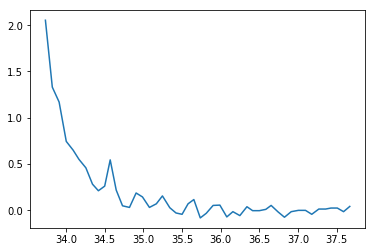

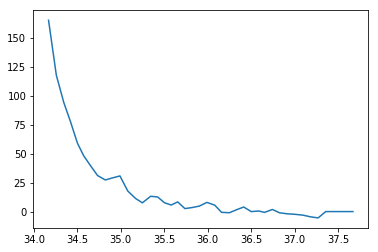

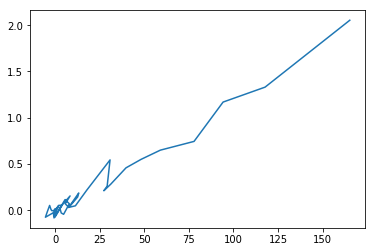

LinregressResult(slope=0.01187604093171228, intercept=-0.014350861269351672, rvalue=0.988915807333196, pvalue=1.3664164728198148e-35, stderr=0.0002784714468258046)
kal:  0.01187604093171228


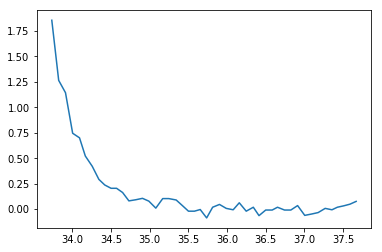

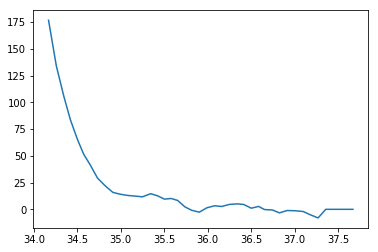

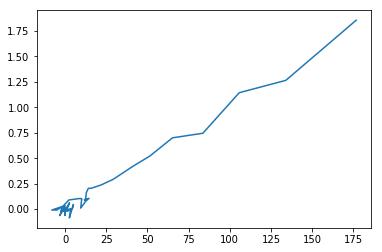

LinregressResult(slope=0.010171662484934233, intercept=-0.005518366265026137, rvalue=0.9927464072200743, pvalue=2.376953198230353e-39, stderr=0.00019238193618112488)
kar:  0.010171662484934233


In [79]:
pyplot.plot(ts, noaccelvoltagesl)
pyplot.show()
pyplot.plot(ts[5:], accelsl[5:])
pyplot.show()
pyplot.plot(accelsl[5:], noaccelvoltagesl[:-5])
pyplot.show()
x=stats.linregress(accelsl[5:], noaccelvoltagesl[:-5])
print(x)
kal= x.slope
print ("kal: ", kal)
pyplot.plot(ts, noaccelvoltagesr)
pyplot.show()
pyplot.plot(ts[5:], accelsr[5:])
pyplot.show()
pyplot.plot(accelsr[5:], noaccelvoltagesr[:-5])
pyplot.show()
x=stats.linregress(accelsr[5:], noaccelvoltagesr[:-5])
print(x)
kar= x.slope
print ("kar: ", kar)

In [88]:
data=read_csv("drivetrain3.csv")
s = 237
e = 288
ts=data["time"][s:e]
vsl=data["enc_vel_l"][s:e]
vsr=-data["enc_vel_r"][s:e]
bus_voltages = data["voltage"][s:e]
percentVLeft = data["VRL"][s:e]
voltages = (bus_voltages * percentVLeft)

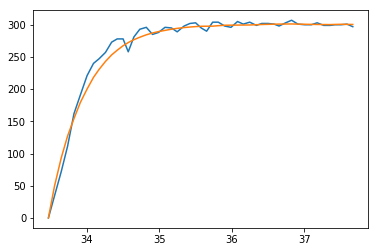

bah, adjusted kal:  0.00593802046585614


In [99]:
vsl2 = numpy.zeros(shape=vsl.shape)
def accel_l(voltage, velocity):
    return (voltage - ksl - kvl * velocity) / (kal*0.5)

for i in range(1, len(vsl)):
    vsl2[i] = vsl2[i-1] + accel_l(voltages[i], vsl2[i-1]) * (ts[i]-ts[i-1])

pyplot.plot(ts, vsl)
pyplot.plot(ts, vsl2)
pyplot.show()
kal2 = kal * 0.5
print ("bah, adjusted kal: ", kal2)

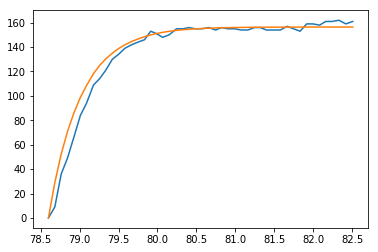

bah, adjusted kar:  0.00593802046585614


In [118]:
vsr2 = numpy.zeros(shape=vsr.shape)
def accel_r(voltage, velocity):
    return (voltage - ksr - kvr * velocity) / (kal*.5)

for i in range(1, len(vsl)):
    vsr2[i] = vsr2[i-1] + accel_r(voltages[i], vsr2[i-1]) * (ts[i]-ts[i-1])

pyplot.plot(ts, vsr)
pyplot.plot(ts, vsr2)
pyplot.show()

kar2 = kal * 0.5
print ("bah, adjusted kar: ", kar2)

In [107]:
data=read_csv("drivetrain1.csv")
s = 2
e = 50
ts=data["time"][s:e]
vsl=data["enc_vel_l"][s:e]
vsr=-data["enc_vel_r"][s:e]
bus_voltages = data["voltage"][s:e]
percentVLeft = data["VRL"][s:e]
voltages = (bus_voltages * percentVLeft)

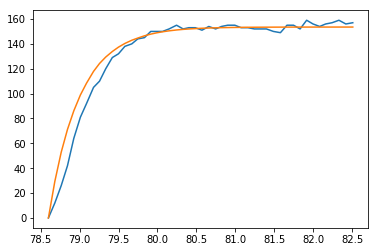

In [109]:
vsl2 = numpy.zeros(shape=vsl.shape)
def accel_l(voltage, velocity):
    return (voltage - ksl - kvl * velocity) / (kal2)

for i in range(1, len(vsl)):
    vsl2[i] = vsl2[i-1] + accel_l(voltages[i], vsl2[i-1]) * (ts[i]-ts[i-1])

pyplot.plot(ts, vsl)
pyplot.plot(ts, vsl2)
pyplot.show()

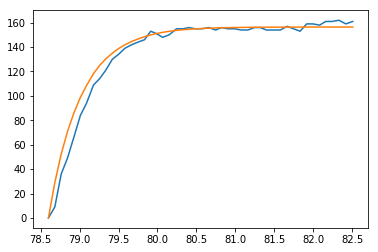

In [119]:
vsr2 = numpy.zeros(shape=vsr.shape)
def accel_r(voltage, velocity):
    return (voltage - ksr - kvr * velocity) / (kar2)

for i in range(1, len(vsl)):
    vsr2[i] = vsr2[i-1] + accel_r(voltages[i], vsr2[i-1]) * (ts[i]-ts[i-1])

pyplot.plot(ts, vsr)
pyplot.plot(ts, vsr2)
pyplot.show()

In [124]:
print ("V = Ks + Kv * v + Ka * a")
print ("where Ks=%f, Kv=%f, Ka=%f for left side" % (ksl, kvl, kal2))
print ("where Ks=%f, Kv=%f, Ka=%f for right side" % (ksr, kvr, kar2))
print ("where units of Ks is V, units of Kv is V * (100 ms) / encoder tick")
print("and units of Ka is V * s * (100 ms) / encoder tick (i think..)")

V = Ks + Kv * v + Ka * a
where Ks=1.293985, Kv=0.014172, Ka=0.005938 for left side
where Ks=1.320812, Kv=0.013736, Ka=0.005938 for right side
where units of Ks is V, units of Kv is V * (100 ms) / encoder tick
and units of Ka is V * s * (100 ms) / encoder tick (i think..)


In [123]:
def voltage_for_velocity(v):
    return(
        ksr + kvr * v,
        ksl + kvl * v,
    )

print(voltage_for_velocity(10))

(1.4581762078834293, 1.4357022768271093)
